In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
df.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [4]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
print("There are " + str(df.shape[0]) + " rows.\n")
print("There are " + str(df.shape[1]) + " columns.")

There are 48895 rows.

There are 16 columns.


In [6]:
#checking for duplicate rows
df.duplicated().sum()

0

In [7]:
#Number of rows with missing values
NA_rows = df.isnull().any(axis = 1).sum() 
percent_missing = round((NA_rows/df.shape[0]) * 100, 2)
print("There are " + str(NA_rows) + " rows with at least one missing value in this dataset.\nThis means " + 
      str(percent_missing) + "% of the data is incomplete.")

There are 10074 rows with at least one missing value in this dataset.
This means 20.6% of the data is incomplete.


In [8]:
#number of missing entries per columnn
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

last_review and reviews_per_month are both missing in 10,052 rows.

In [10]:
#checking for patterns in rows missing the listing name.
df[(df["name"].isnull() == True)].head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0


In [11]:
#checking for patterns in rows missing the host name
df[(df["host_name"].isnull() == True)].head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359


There doesn't appear to be any concerning trend in the rows missing the listing name or host name, so these rows don't need to be dropped from the dataset.

In [13]:
#Summary for quanititative columns excluding id and host_id columns
df.loc[:, (df.columns != 'id') & (df.columns != 'host_id')].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [14]:
(df["price"] == 0).sum()

11

It's a bit interesting that the minimum price is $0 as free AirBnBs seem unlikely. There are 11 rows where the price is listed as $0, so this may be a data entry error or missing data.

In [16]:
#Percentage of listing that have a minimum stay requirement of more than 7 days
round(((df["minimum_nights"]>7).sum()/df.shape[0]) * 100 ,2)

15.0

In [17]:
#Percentage of listing that require you to stay for at least a year
round(((df["minimum_nights"]>=365).sum()/df.shape[0]) * 100 ,2)

0.09

In [18]:
#Number of Neighbourhood groups and their names
df["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [19]:
#Number of room types and their names
df["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [20]:
#Number of AirBnB listings for each neighbourhood
df["id"].groupby(df["neighbourhood_group"]).count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: id, dtype: int64

In [21]:
#Average price for neighbourhood groups
avg_prices = df["price"].groupby(df["neighbourhood_group"]).mean()
avg_prices

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

<Axes: xlabel='neighbourhood_group', ylabel='price'>

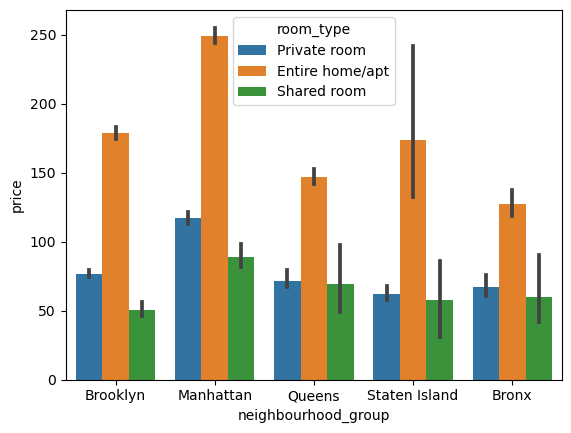

In [22]:
sb.barplot(data = df, x = "neighbourhood_group", y = "price", hue = "room_type")

In [23]:
#Number of neighbourhoods
len(df["neighbourhood"].unique())

221

In [24]:
#Number of neighbourhoods in each neighbourhood group
df["neighbourhood"].groupby(df["neighbourhood_group"]).nunique()

neighbourhood_group
Bronx            48
Brooklyn         47
Manhattan        32
Queens           51
Staten Island    43
Name: neighbourhood, dtype: int64

In [25]:
#Number of AirBnBs fully booked for 2019
(df["availability_365"] == 0).sum()

17533

<Axes: xlabel='number_of_reviews', ylabel='price'>

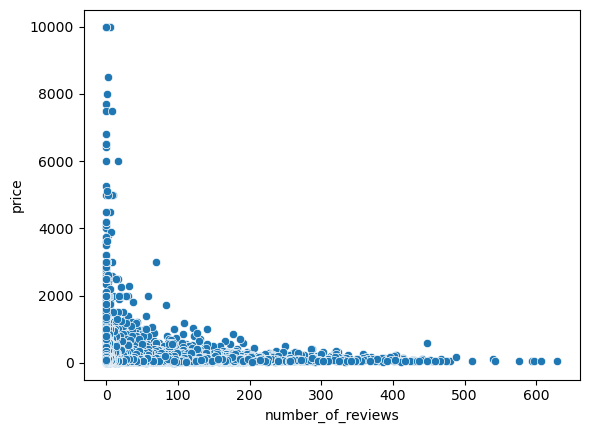

In [26]:
sb.scatterplot(data = df, x = "number_of_reviews", y = "price")

The number of reviews increases as the price decreases. This is reasonable as cheaper AirBnBs are more accessible and likely have more guests than expensive AirBnBs.

In [28]:
#Listings with price of $10,000
df[(df["price"] == 10000)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83


In [29]:
#2019 10 AirBnB hosts with the most listings in NYC
df.groupby(["host_id", "host_name","neighbourhood_group"]).agg(
    count_col=pd.NamedAgg(column="host_id", aggfunc="count")
).sort_values(by = "count_col", ascending = False).head(10)

,,,count_col
host_id,host_name,neighbourhood_group,
219517861,Sonder (NYC),Manhattan,327
107434423,Blueground,Manhattan,230
30283594,Kara,Manhattan,121
12243051,Sonder,Manhattan,96
16098958,Jeremy & Laura,Manhattan,96
61391963,Corporate Housing,Manhattan,91
22541573,Ken,Manhattan,86
137358866,Kazuya,Queens,79
200380610,Pranjal,Manhattan,65
